In [2]:
# Full setup
import duckdb
import pandas as pd
from sodapy import Socrata
import database_setup.database_setup as dbs
import database_setup.mta_dataset as mta
from dotenv import load_dotenv
import os

load_dotenv()

%reload_ext sql
conn = dbs.get_database_connection(os.getenv('DEV_DATABASE'))
%sql conn --alias duckdb

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
df = conn.sql('select * from main.fct_station_priority').to_df()

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

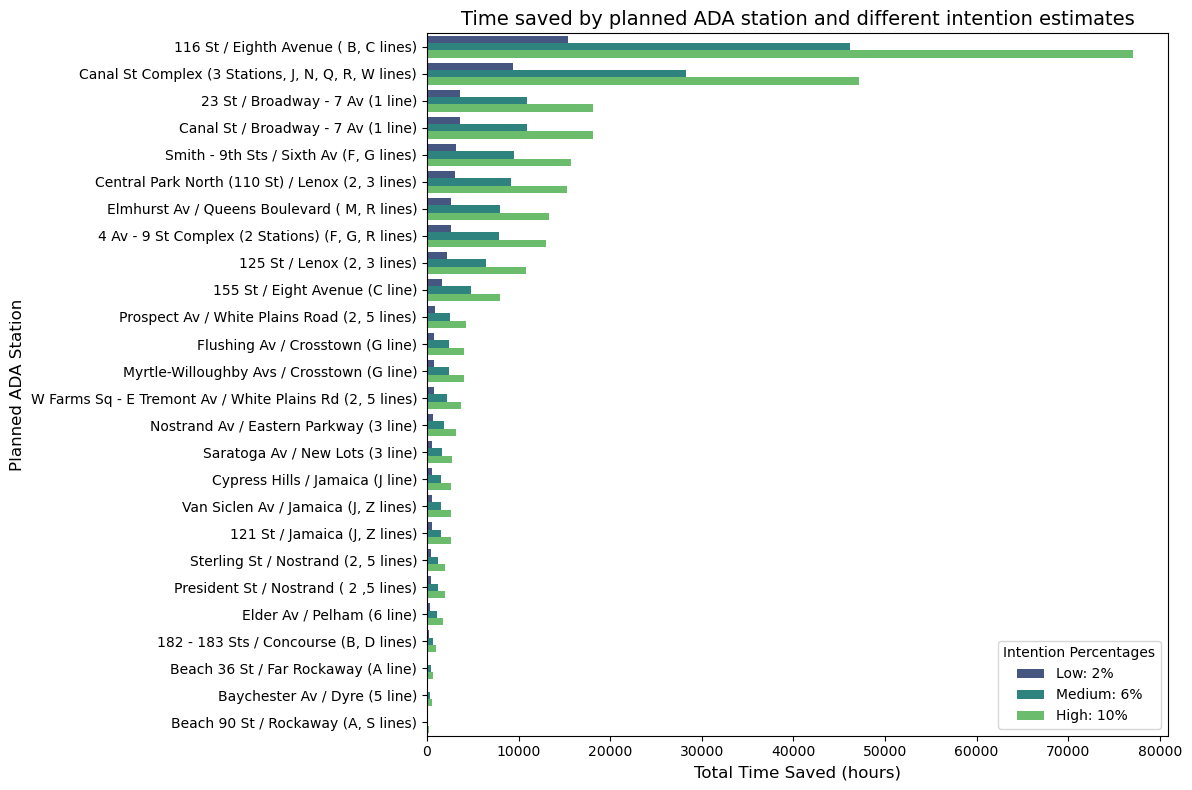

In [10]:
df_melted = pd.melt(df, 
                    id_vars='planned_ada_station', 
                    value_vars=['total_time_gain_hrs_2p', 'total_time_gain_hrs_6p', 'total_time_gain_hrs_10p'], 
                    var_name='time_period', 
                    value_name='total_time_gain')

# Rename the time periods for better readability
df_melted['time_period'] = df_melted['time_period'].replace({
    'total_time_gain_hrs_2p': 'Low: 2%', 
    'total_time_gain_hrs_6p': 'Medium: 6%', 
    'total_time_gain_hrs_10p': 'High: 10%'
})

# Set the plot size
plt.figure(figsize=(12, 8))

# Create the clustered barplot
sns.barplot(
    x='total_time_gain', 
    y='planned_ada_station', 
    hue='time_period', 
    data=df_melted, 
    palette='viridis'  # Aesthetic color palette
)

# Set plot labels and title
plt.xlabel('Total Time Saved (hours)', fontsize=12)
plt.ylabel('Planned ADA Station', fontsize=12)
plt.title('Time saved by planned ADA station and different intention estimates', fontsize=14)

# Display the legend
plt.legend(title='Intention Percentages')

# Display the plot
plt.tight_layout()
plt.savefig("clustered_bar_chart_high_quality.jpg", format="jpg", dpi=300)
plt.show()